# Telecom Customer Churn
This dataset comes from an Iranian telecom company, with each row representing a customer over a year period. Along with a churn label, there is information on the customers' activity, such as call failures and subscription length. 

Not sure where to begin? Scroll to the bottom to find challenges!

In [1]:
import pandas as pd

df = pd.read_csv("data/customer_churn.csv")

## Data Dictionary
| Column                  | Explanation                                             |
|-------------------------|---------------------------------------------------------|
| Call Failure            | number of call failures                                 |
| Complaints              | binary (0: No complaint, 1: complaint)                  |
| Subscription Length     | total months of subscription                            |
| Charge Amount           | ordinal attribute (0: lowest amount, 9: highest amount) |
| Seconds of Use          | total seconds of calls                                  |
| Frequency of use        | total number of calls                                   |
| Frequency of SMS        | total number of text messages                           |
| Distinct Called Numbers | total number of distinct phone calls                    |
| Age Group               | ordinal attribute (1: younger age, 5: older age)        |
| Tariff Plan             | binary (1: Pay as you go, 2: contractual)               |
| Status                  | binary (1: active, 2: non-active)                       |
| Age                     | age of customer                                         |
| Customer Value          | the calculated value of customer                        |
| Churn                   | class label (1: churn, 0: non-churn)                    |

[Source](https://www.kaggle.com/royjafari/customer-churn)  of dataset and [source](https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset) of dataset description. 

**Citation**: Jafari-Marandi, R., Denton, J., Idris, A., Smith, B. K., & Keramati, A. (2020). Optimum Profit-Driven Churn Decision Making: Innovative Artificial Neural Networks in Telecom Industry. Neural Computing and Applications.

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Which age groups send more SMS messages than make phone calls?
- 📊 **Visualize**: Create a plot visualizing the number of distinct phone calls by age group. Within the chart, differentiate between short, medium, and long calls (by the number of seconds).
- 🔎 **Analyze**: Are there significant differences between the length of phone calls between different tariff plans?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You have just been hired by a telecom company. A competitor has recently entered the market and is offering an attractive plan to new customers. The telecom company is worried that this competitor may start attracting its customers.

You have access to a dataset of the company's customers, including whether customers churned. The telecom company wants to know whether you can use this data to predict whether a customer will churn. They also want to know what factors increase the probability that a customer churns.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

### Importing libraries

In [2]:
#data manipulation libraries
import pandas as pd
import numpy as np

#data vizualisation
import seaborn as sns
import matplotlib.pyplot as plt

#model building
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#scaling the dataset
from sklearn.preprocessing import StandardScaler

#model evaluation 
from sklearn.metrics import classification_report, confusion_matrix

### Importing the dataset


In [3]:
#importing the dataset
df = pd.read_csv('data/customer_churn.csv')
# printing the first 5 rows
df.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


**Data Sanity checks**

In [4]:
#checking the number of rows and columns in the dataset
df.shape

(3150, 14)

In [5]:
# checking the datatypes in the rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             3150 non-null   int64  
 1   Complaints               3150 non-null   int64  
 2   Subscription Length      3150 non-null   int64  
 3   Charge Amount            3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [6]:
#checking duplicates in the dataset
df.duplicated().sum()

300

- There are 300 duplicates in the dataset. Dropping these duplicates

In [7]:
# dropiing the duplicates
df.drop_duplicates()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3097,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3099,8,1,11,2,1792,25,7,9,3,1,1,30,100.680,1
3123,26,0,38,9,10740,99,8,44,5,2,1,55,174.585,0


In [8]:
#checking for missing values 
df.isnull().sum()

Call Failure               0
Complaints                 0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

- There are no missing values in the dataset

In [9]:
# Getting the statistical summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Call Failure,3150.0,7.627937,7.263886,0.0,1.00000,6.00,12.00000,36.00
Complaints,3150.0,0.076508,0.265851,0.0,0.00000,0.00,0.00000,1.00
Subscription Length,3150.0,32.541905,8.573482,3.0,30.00000,35.00,38.00000,47.00
Charge Amount,3150.0,0.942857,1.521072,0.0,0.00000,0.00,1.00000,10.00
Seconds of Use,3150.0,4472.459683,4197.908687,0.0,1391.25000,2990.00,6478.25000,17090.00
Frequency of use,3150.0,69.460635,57.413308,0.0,27.00000,54.00,95.00000,255.00
Frequency of SMS,3150.0,73.174921,112.237560,0.0,6.00000,21.00,87.00000,522.00
Distinct Called Numbers,3150.0,23.509841,17.217337,0.0,10.00000,21.00,34.00000,97.00
Age Group,3150.0,2.826032,0.892555,1.0,2.00000,3.00,3.00000,5.00
Tariff Plan,3150.0,1.077778,0.267864,1.0,1.00000,1.00,1.00000,2.00


### EDA

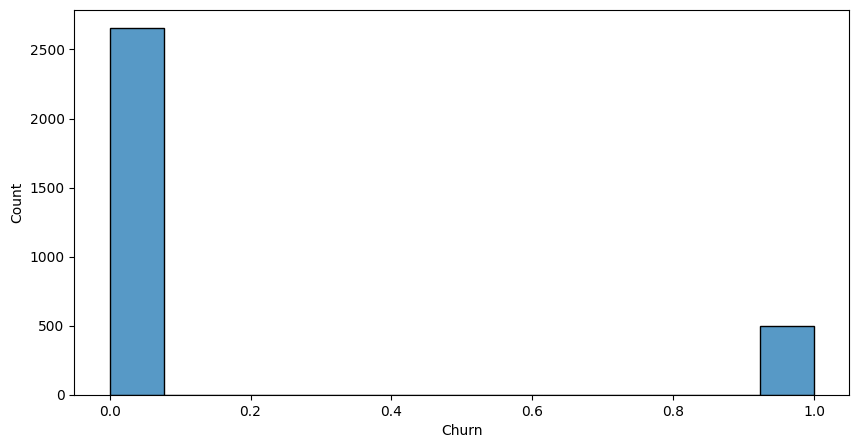

In [10]:
#checking the target variable
plt.figure(figsize = (10,5))
sns.histplot(df, x ='Churn')
plt.show()

In [11]:
#getting the value counts of churn
df['Churn'].value_counts()

0    2655
1     495
Name: Churn, dtype: int64

- Churn is very imbalanced.

### Feature engineering

In [12]:
# copying the dataset
df1 = df.copy()
df1.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


**Defining the independent and dependent variables**

In [13]:
#dropping the churn variable
x = df.drop(['Churn'], axis= 1)
y= df.pop('Churn')
print(x.head())

   Call Failure  Complaints  Subscription Length  ...  Status  Age  Customer Value
0             8           0                   38  ...       1   30         197.640
1             0           0                   39  ...       2   25          46.035
2            10           0                   37  ...       1   30        1536.520
3            10           0                   38  ...       1   15         240.020
4             3           0                   38  ...       1   15         145.805

[5 rows x 13 columns]


**Splitting the dataset into train and test set**

In [14]:
#splitting the dataset
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state= 1, stratify= y)
#printing the shape of the train and test sets
print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_test: ' ,y_test.shape)

Shape of x_train:  (2205, 13)
Shape of y_train:  (2205,)
Shape of x_test:  (945, 13)
Shape of y_test:  (945,)


**Scaling the data**

In [15]:
#initializing the scaler
scaler = StandardScaler()

#copying the train and test set
x_train1 = x_train.copy()
x_test1 = x_test.copy()

#scaling
x_train1 = scaler.fit_transform(x_train1)
x_test1 = scaler.transform(x_test1)

In [16]:
#getting the mean and std of scaled and unscaled data
print('mean of scaled x_train: ', np.mean(x_train1), 'standerd dev of scaled data: ', np.std(x_train1))

mean of scaled x_train:  4.2139286614064896e-17 standerd dev of scaled data:  1.0


**Model building**

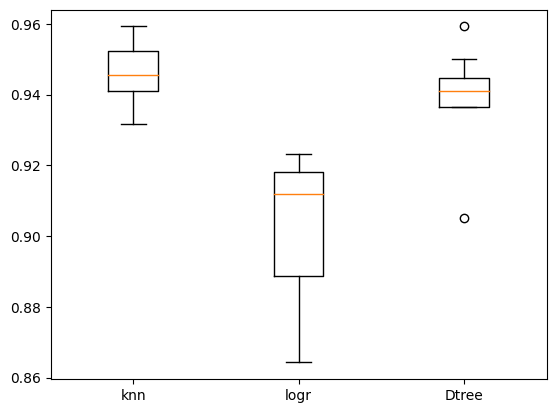

In [17]:
#building a dictionary of the models
models = { 
    'knn': KNeighborsClassifier(),
    'logr': LogisticRegression(),
    'Dtree': DecisionTreeClassifier()
}

#creating a list to store results
results = []

#function to fit the models
for model in models.values():
    kf = KFold(n_splits=10, random_state=1 , shuffle= True)
    crossval = cross_val_score(model, x_train1, y_train, cv = kf)
    results.append(crossval)
    
#plotting the results
plt.boxplot(results, labels=models.keys())
plt.show()

**fitting the models on the train data**

In [18]:
#function to fit the models
for name, model in models.items():
    model.fit(x_train1, y_train)
    test_score= model.score(x_test1, y_test)
    print('accuracy of model ', name, 'is:', test_score)

accuracy of model  knn is: 0.9470899470899471
accuracy of model  logr is: 0.8846560846560847
accuracy of model  Dtree is: 0.9439153439153439


- The k nearest neighbor has the highest accuracy

**Predicting on the test data**

In [19]:
#prediction on knn
y_pred = models['knn'].predict(x_test1)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 

- The code shows predictions of knn

**Making a confusion matrix**

In [20]:
print(confusion_matrix(y_test,y_pred))

[[780  16]
 [ 34 115]]


**printing a classification report of the model**

In [21]:
#getting the classification report of the model
classrep_knn = classification_report(y_test, y_pred)
print(classrep_knn)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       796
           1       0.88      0.77      0.82       149

    accuracy                           0.95       945
   macro avg       0.92      0.88      0.90       945
weighted avg       0.95      0.95      0.95       945



**predicting on logistic regression**

In [22]:
#prediction on knn
y_pred1 = models['logr'].predict(x_test1)
print(y_pred1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 

In [23]:
#printing the confusion matrix
print(confusion_matrix(y_test, y_pred1))

[[783  13]
 [ 96  53]]


In [24]:
#printing the classification report
classrep_logr = classification_report(y_test,y_pred1)
print(classrep_logr)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       796
           1       0.80      0.36      0.49       149

    accuracy                           0.88       945
   macro avg       0.85      0.67      0.71       945
weighted avg       0.88      0.88      0.87       945



- logistic regression model has a low recsll and f1 score on class 1

**predicting on the decision tree model**

In [25]:
y_pred2 = models['Dtree'].predict(x_test1)
print(y_pred2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 

In [26]:
#printing the confusion matrix
print(confusion_matrix(y_test, y_pred2))

[[773  23]
 [ 30 119]]


In [27]:
#getting the classification report
classrep_Dtree = classification_report(y_test,y_pred2)
print(classrep_Dtree)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       796
           1       0.84      0.80      0.82       149

    accuracy                           0.94       945
   macro avg       0.90      0.88      0.89       945
weighted avg       0.94      0.94      0.94       945



- The scores are balanced. 
- The best performing model is the Knn model
